In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from feature_engine.transformation import YeoJohnsonTransformer, BoxCoxTransformer, PowerTransformer
from feature_engine.encoding import OrdinalEncoder

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
dataset = pd.read_csv('../Hitters.csv')
dataset.dropna(subset = ['Salary'], inplace = True)

print(dataset.shape)

dataset.head()

(263, 20)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


# Seperate train and test data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop(['Salary'], axis = 1),
    dataset['Salary'],
    test_size = 0.40,
    random_state = 0 
)

print(X_train.shape, X_test.shape)

(157, 19) (106, 19)


# Feature Engineering

In [5]:
y_train = np.log(y_train)
y_test = np.log(y_test)

## Numerical Features Transformations

**I decided to apply these transformations based on Data Analysis Section.**

### Yeojohnson Transformation

In [6]:
to_yeojohnson = ['AtBat', 'HmRun', 'Runs', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Years', 'Assists']

In [7]:
yeojohnson = YeoJohnsonTransformer(variables = to_yeojohnson)
yeojohnson.fit(X_train, y_train)

X_train = yeojohnson.transform(X_train)
X_test = yeojohnson.transform(X_test)

### Box-Cox Transformation

In [8]:
to_boxcox = ['Hits']

In [9]:
boxcox = BoxCoxTransformer(variables = to_boxcox)
boxcox.fit(X_train, y_train)

X_train = boxcox.transform(X_train)
X_test = boxcox.transform(X_test)

### Square root Transformation

In [10]:
to_sqrt = ['RBI', 'Walks', 'Errors']

In [11]:
sqrt = PowerTransformer(variables = to_sqrt, exp = 0.5)
sqrt.fit(X_train, y_train)

X_train = sqrt.transform(X_train)
X_test = sqrt.transform(X_test)

## Handling Outliers

In [12]:
# from feature_engine.outliers import Winsorizer

# outliers = ['HmRun', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors']

# windsoriser = Winsorizer(capping_method='quantiles', tail='both', fold=0.08, variables=outliers)
# windsoriser.fit(X_train)

# X_train = windsoriser.transform(X_train)
# X_test = windsoriser.transform(X_test)

**Capping the variable distribution at max or min value**<br>

**capping_method: Desired outlier detection method. Can take 'gaussian', 'iqr' or 'quantiles'.**

**tail: Whether to look for outliers on the right, left or both tails of the distribution. Can take 'left', 'right' or 'both'.**

**fold: The factor used to multiply the std or IQR to calculate the maximum or minimum allowed values. Recommended values are 2 or 3 for the gaussian approximation, <br> 
        and 1.5 or 3 for the IQR proximity rule.**


## Categorical Feature Transformations

In [13]:
categorical_features = [feature for feature in X_train.columns if X_train[feature].dtype == 'object']

In [14]:
ordinal = OrdinalEncoder(variables = categorical_features)
ordinal.fit(X_train, y_train)

X_train = ordinal.transform(X_train)
X_test = ordinal.transform(X_test)

In [15]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague
237,262.783061,25.237007,2.723054,14.635882,4.358899,4.582576,2.123186,20.412508,13.003476,4.323253,9.734375,8.049727,6.926347,0,1,11.265575,0.729679,2.000000,0
81,284.453512,30.012213,2.981460,16.481575,5.916080,6.557439,3.619162,32.864838,21.440086,8.099975,16.977406,12.797059,12.027737,1,1,7.096414,5.457428,2.828427,1
75,478.653006,45.100912,2.723054,18.216948,6.782330,3.605551,2.868528,28.052394,18.673026,4.823076,13.435967,10.502489,7.061756,0,1,12.373511,8.827090,2.828427,1
184,666.604972,56.214267,4.022406,21.240765,8.888194,7.280110,2.868528,26.694511,17.718325,6.695284,12.489768,11.968899,9.277322,1,1,11.473250,3.223890,2.000000,1
61,170.912115,20.890218,2.723054,9.289073,4.795832,3.872983,3.720807,33.333978,21.336468,7.057366,15.207364,13.091584,11.871231,1,1,7.207631,6.356135,1.732051,1


## Feature Scaling

In [16]:
scaler = StandardScaler()
scaler.fit(X_train, y_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [17]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague
0,-1.169346,-1.170252,-0.502397,-0.484881,-1.421112,-0.937104,-0.302493,-0.464089,-0.448339,-0.381296,-0.414679,-0.522458,-0.472085,-1.032371,1.045626,-0.205648,-1.576738,-0.699884,-0.993651
1,-1.040027,-0.815763,-0.346106,-0.144261,-0.558097,0.207033,1.517962,1.509594,1.434559,1.287241,1.729006,1.125218,1.819303,0.968644,1.045626,-1.179580,-0.017205,0.002973,1.006390
2,0.118864,0.304351,-0.502397,0.176000,-0.078006,-1.503143,0.604514,0.746826,0.817001,-0.160477,0.680864,0.328832,-0.411264,-1.032371,1.045626,0.053170,1.094338,0.002973,1.006390
3,1.240472,1.129354,0.283489,0.734042,1.089099,0.625712,0.604514,0.531603,0.603929,0.666655,0.400822,0.837785,0.583901,0.968644,1.045626,-0.157134,-0.753978,-0.699884,1.006390
4,-1.717589,-1.492937,-0.502397,-1.471628,-1.178957,-1.348206,1.641654,1.583952,1.411433,0.826621,1.205136,1.227440,1.749005,0.968644,1.045626,-1.153599,0.279250,-0.927218,1.006390


# Model Trianing

In [18]:
def model_evaluation(y, y_pred, method = 'plot'):
    
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    
    if method == 'plot':
        fig = plt.figure(figsize = (18, 6))
    
        plt.subplot(1, 3, 1)
        sns.regplot(x = y, y = y_pred, line_kws = {'color': 'r'}, label = 'r2 score: {:.2f}'.format(r2_score(y, y_pred)))
        plt.legend(loc = 'upper center')

        plt.subplot(1, 3, 2)
        errors = y - y_pred
        errors.hist(bins = 30, )
        plt.xlabel('Error Distribution')

        plt.subplot(1, 3, 3)
        plt.barh(y = 'MSE', width = mse, height = 1.0)
        plt.barh(y = 'MBE', width = mae)
        plt.barh(y = 'r2', width = r2)
        plt.xlabel('Metric Bars')

        plt.show()
    
    if method == 'metrics':
        
        return [mse, mae, r2]

## Linear Regression

In [19]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

In [20]:
plt.style.use('fivethirtyeight')

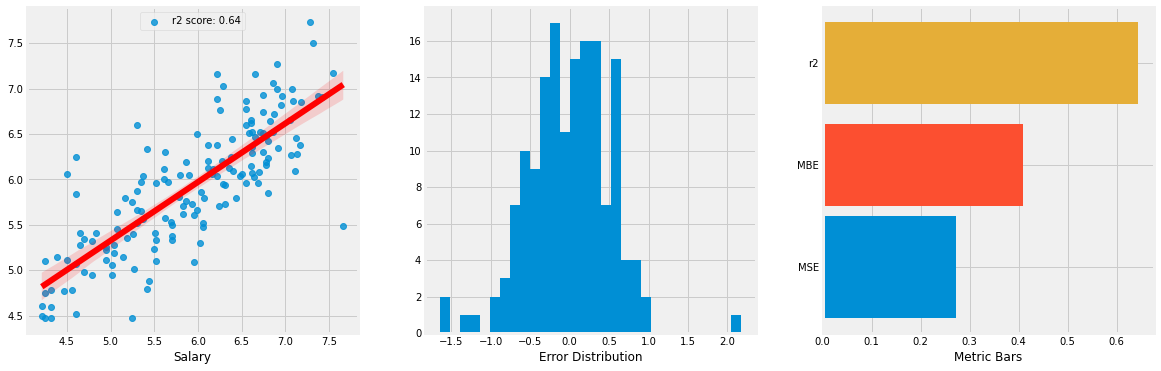

In [21]:
model_evaluation(y_train, y_train_pred)

In [22]:
linear_train_mse, linear_train_mae, linear_train_r2 = model_evaluation(y_train, y_train_pred, method = 'metrics')

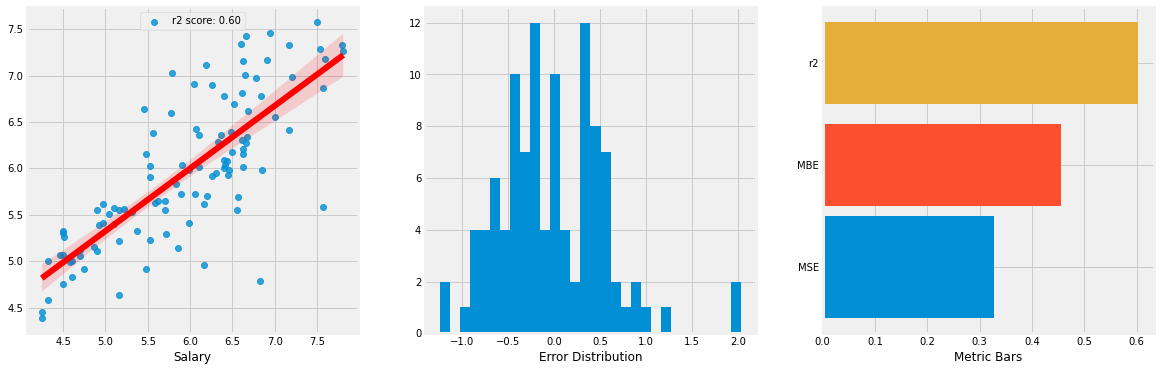

In [23]:
model_evaluation(y_test, y_test_pred)

In [24]:
linear_test_mse, linear_test_mae, linear_test_r2 = model_evaluation(y_test, y_test_pred, method = 'metrics')

## Huber Regression

In [25]:
regressor_huber = HuberRegressor(max_iter = 1000, epsilon = 1.1)
regressor_huber.fit(X_train, y_train)

y_train_pred = regressor_huber.predict(X_train)
y_test_pred = regressor_huber.predict(X_test)

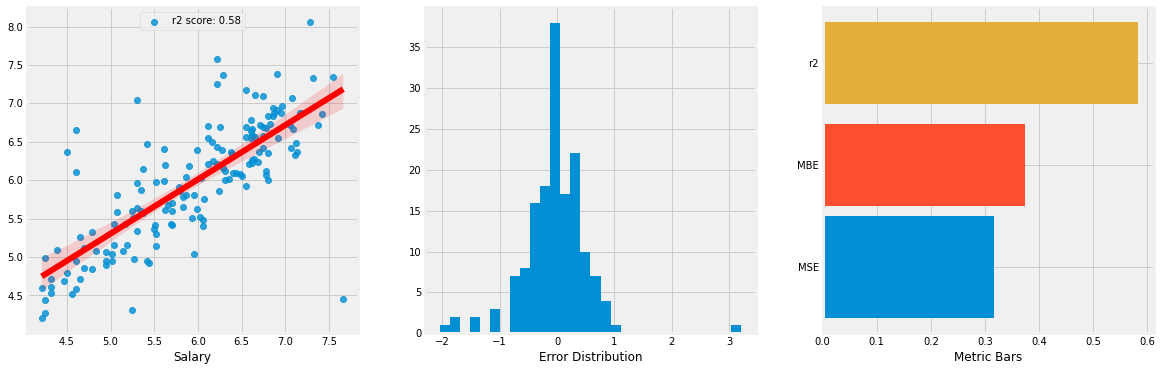

In [26]:
model_evaluation(y_train, y_train_pred)

In [27]:
huber_train_mse,huber_train_mae, huber_train_r2 = model_evaluation(y_train, y_train_pred, method = 'metrics')

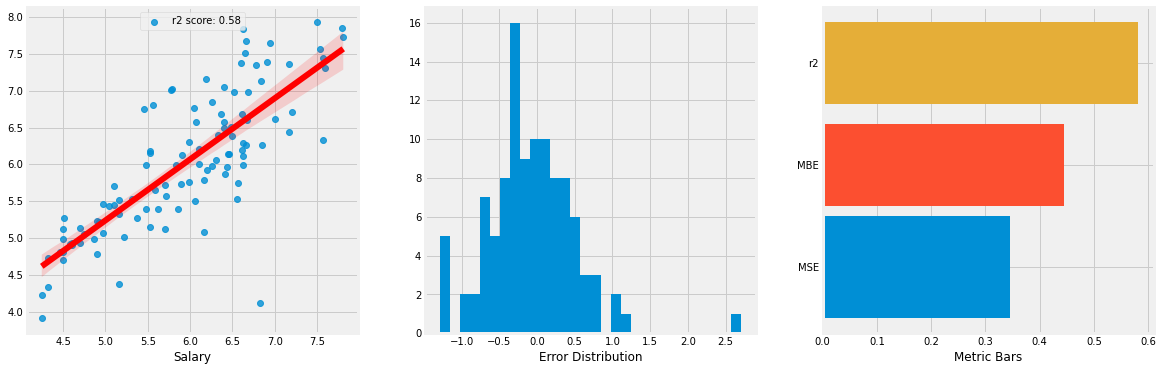

In [28]:
model_evaluation(y_test, y_test_pred)

In [29]:
huber_test_mse, huber_test_mae, huber_test_r2 = model_evaluation(y_test, y_test_pred, method = 'metrics')

## Support Vector Regression

In [30]:
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)


y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

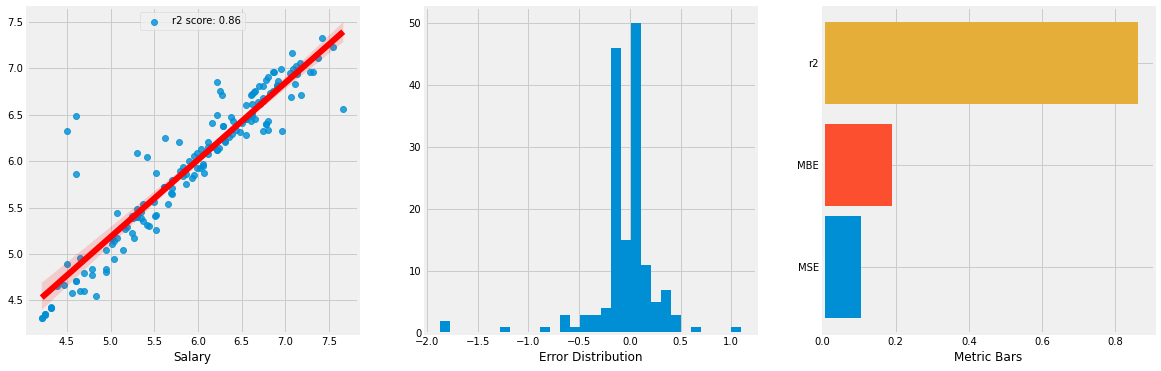

In [31]:
model_evaluation(y_train, y_train_pred)

In [32]:
svr_train_mse, svr_train_mae, svr_train_r2 = model_evaluation(y_train, y_train_pred, method = 'metrics')

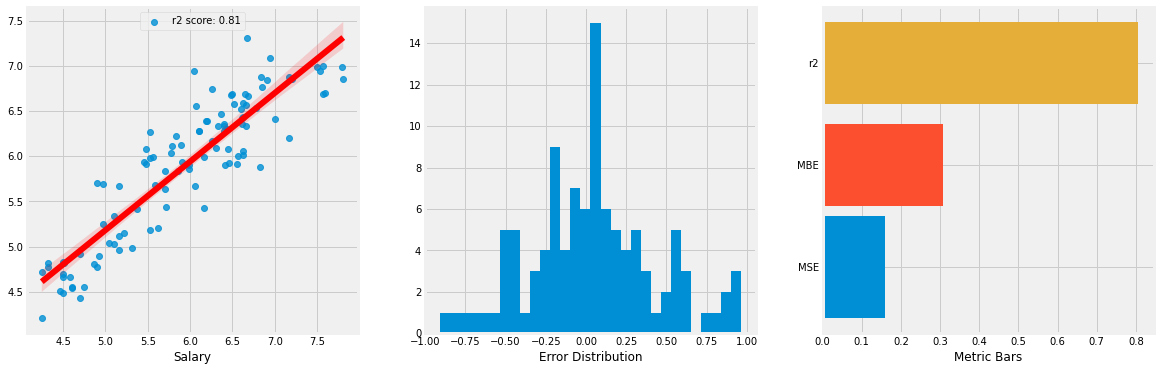

In [33]:
model_evaluation(y_test, y_test_pred)

In [34]:
svr_test_mse, svr_test_mae, svr_test_r2 = model_evaluation(y_test, y_test_pred, method = 'metrics')

## Random Forest Regression

In [35]:
from sklearn.ensemble import RandomForestRegressor
random_tree = RandomForestRegressor(n_estimators = 200, random_state = 0, criterion = 'absolute_error')
random_tree.fit(X_train, y_train)

y_train_pred = random_tree.predict(X_train)
y_test_pred = random_tree.predict(X_test)

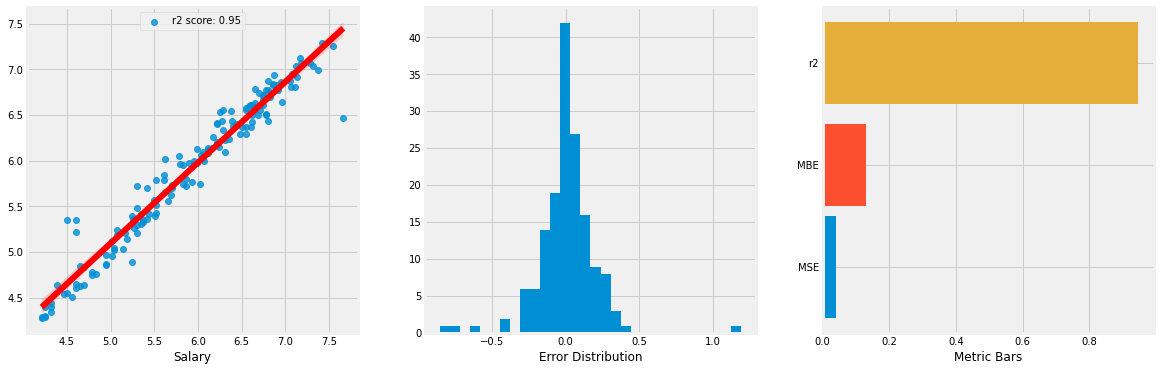

In [36]:
model_evaluation(y_train, y_train_pred)

In [37]:
forest_train_mse, forest_train_mae, forest_train_r2 = model_evaluation(y_train, y_train_pred, method = 'metrics')

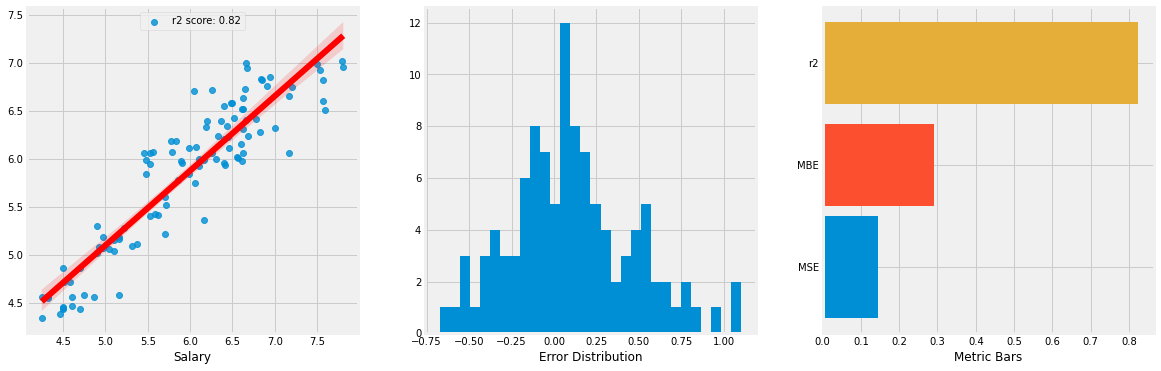

In [38]:
model_evaluation(y_test, y_test_pred)

In [39]:
forest_test_mse, forest_test_mae, forest_test_r2 = model_evaluation(y_test, y_test_pred, method = 'metrics')

## Decision Tree Regression

In [40]:
decision_tree = DecisionTreeRegressor(random_state = 0)
decision_tree.fit(X_train, y_train)

y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

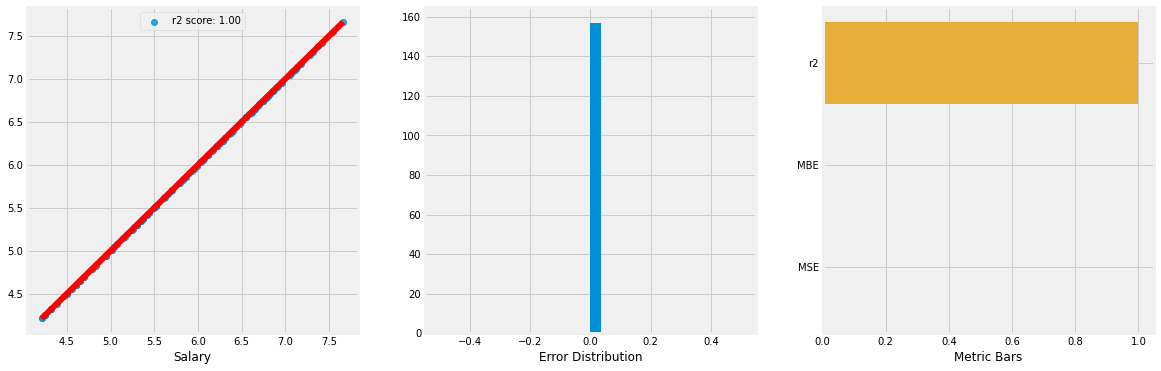

In [41]:
model_evaluation(y_train, y_train_pred)

In [42]:
decision_train_mse, decision_train_mae, decision_train_r2 = model_evaluation(y_train, y_train_pred, method = 'metrics')

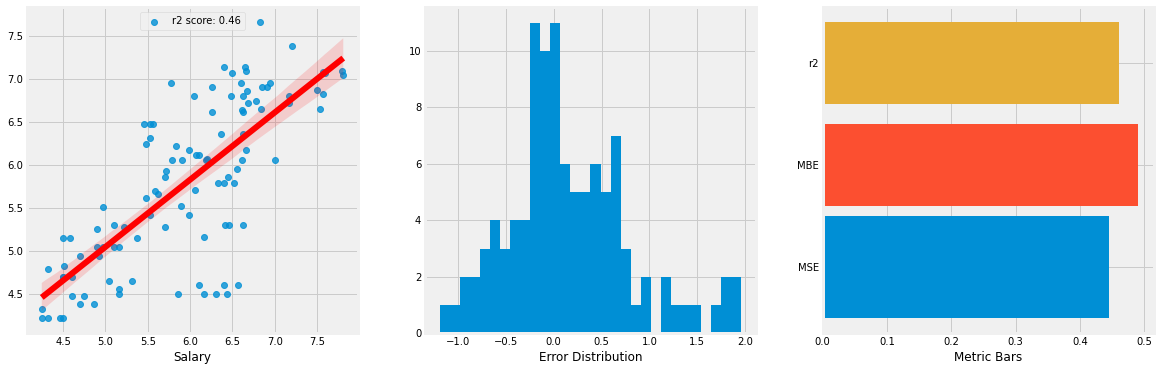

In [43]:
model_evaluation(y_test, y_test_pred)

In [44]:
decision_test_mse, decision_test_mae, decision_test_r2 = model_evaluation(y_test, y_test_pred, method = 'metrics')

# Summary Metrics

In [52]:
summary_metrics = pd.DataFrame({
    'Model': ['Linear Regression', 'Huber Regression', 'Support Vector Machines', 'Randon Forest Regression', 'Decision Tree Regression'],
    'train_r2': [linear_train_r2, huber_train_r2, svr_train_r2, forest_train_r2, decision_train_r2],
    'test_r2': [linear_test_r2, huber_test_r2, svr_test_r2, forest_test_r2, decision_test_r2],
    'train_mse': [linear_train_mse, huber_train_mse, svr_train_mse, forest_train_mse, decision_train_mse],
    'test_mse': [linear_test_mse, huber_test_mse, svr_test_mse, forest_test_mse, decision_test_mse],
    'train_mae': [linear_train_mae, huber_train_mae, svr_train_mae, forest_train_mae, decision_train_mae],
    'test_mae': [linear_test_mae, huber_test_mae, svr_test_mae, forest_test_mae, decision_test_mae]
})

summary_metrics.sort_values(by = ['test_r2'], ascending = False)

,Model,train_r2,test_r2,train_mse,test_mse,train_mae,test_mae
3,Randon Forest Regression,0.946800,0.824773,0.040565,0.144537,0.128674,0.291922
2,Support Vector Machines,0.863521,0.806688,0.104064,0.159455,0.189840,0.306641
0,Linear Regression,0.644193,0.603257,0.271301,0.327257,0.409119,0.454917
1,Huber Regression,0.583653,0.582075,0.317462,0.344729,0.374632,0.444442
4,Decision Tree Regression,1.000000,0.460490,0.000000,0.445020,0.000000,0.491031
